In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv("../dataFiles/housePrices.csv")
print(data)

   size  bedroom   price
0  2104        3  399900
1  1600        3  329900
2  2400        3  369000
3  1416        2  232000
4  3000        4  539900


In [12]:
# Extract the features (X) and target variable (y)
X = data[['size', 'bedroom']].values
y = data['price'].values.reshape(-1, 1)

# Feature scaling (optional but recommended)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Add a column of ones for the bias term
X_b = np.c_[np.ones((X.shape[0], 1)), X]


In [13]:
learning_rate = 0.01
n_iterations = 1000
m = len(y)

# Initialize coefficients
theta = np.random.rand(3, 1)  # 2 features + bias

# Perform gradient descent
for iteration in range(n_iterations):
    # Calculate predictions
    predictions = X_b.dot(theta)

    # Calculate the error
    error = predictions - y

    # Calculate gradients
    gradients = 2/m * X_b.T.dot(error)

    # Update the coefficients using the gradients
    theta = theta - learning_rate * gradients

# Print the final coefficients
print("Final Coefficients:")
print(theta)

Final Coefficients:
[[374139.99937033]
 [ 37703.5360302 ]
 [ 64006.53237336]]


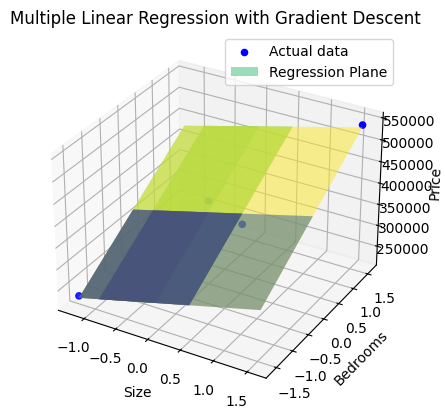

In [14]:

# Visualize the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], y, c='b', marker='o', label='Actual data')
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')

# Create a meshgrid for the plane
size_plane, bedroom_plane = np.meshgrid(X[:, 0], X[:, 1])
price_plane = theta[0] + theta[1] * size_plane + theta[2] * bedroom_plane

# Plot the regression plane
ax.plot_surface(size_plane, bedroom_plane, price_plane, alpha=0.5, cmap='viridis', label='Regression Plane')


plt.title('Multiple Linear Regression with Gradient Descent')
plt.legend()
plt.show()